# Refinitiv Data Platform - Search Function

This notebook demonstrates how to use the Search Capability within the Refinitiv Data Platform. The Search API powers many of the Search applications backend within Eikon/Refinitiv Workspace.

The Search service features several endpoints/functions to guide you in your search process.

    rdp.search: The search service identifies a matching set of documents which satisfy the caller's criteria, sorts it, and selects a subset of the matches to return as the result set.

    rdp.lookup: Finds single best match for each of a list of symbol terms in a given symbology

    rdp.metadata: Complements search and lookup. This service tells you what properties are available and what capabilities they have

    rdp.health: Tests whether the search family is in good shape.

# Import the RDP Library and Connect to Eikon/RWS/

In [14]:
import refinitiv.dataplatform as rdp

rdp.open_desktop_session('DEFAULT_CODE_BOOK_APP_KEY')

## Search
The search service identifies a matching set of documents which satisfy the caller's criteria, sorts it, and selects a subset of the matches to return as the result set. Each step can be controlled via parameters.

By default the fields BusinessEntity, PI, PermID, DocumentTitle, and RIC will be returned, but this can be modified to display fields of interest to you. To learn more about which fields can be pulled, jump to the Metadata service portion of this notebook.

#### Simple Search

In [3]:
df = rdp.search('TSLA')
df

,PermID,RIC,BusinessEntity,PI,DocumentTitle
0,None,None,ORGANISATION,7946087,"Tesla Inc, Public Company"
1,None,None,ORGANISATION,22507471,"Transilvania Leasing si Credit IFN SA, Public ..."
2,21475021920,TSLA.O,QUOTExEQUITY,72106021,"Tesla Inc, Ordinary Share, NASDAQ Global Selec..."
3,21526324324,ROTSLA.BX,QUOTExEQUITY,136552426,"Transilvania Leasing si Credit IFN SA, Ordinar..."
4,21592659789,TSLA34.SA,QUOTExEQUITY,233198638,"Tesla Inc, Depository Receipt, BM&F Bovespa SA..."
5,25727372224,TSLA.BA,QUOTExEQUITY,366529667,"Tesla Inc, Depository Receipt, Bolsa de Comerc..."
6,21475021921,TSLA.OQ,QUOTExEQUITY,72106022,"Tesla Inc, Ordinary Share, NASDAQ Stock Exchan..."
7,21475021927,TSLA.Z,QUOTExEQUITY,72106028,"Tesla Inc, Ordinary Share, Cboe BZX Exchange -..."
8,21475045303,TSLA.DG,QUOTExEQUITY,73239305,"Tesla Inc, Ordinary Share, Cboe EDGX Exchange ..."
9,21728444821,TSLAF192080000.U,QUOTExEQUITY,407673736,OPRA Tesla Motors Equity Options 800 Call Jun ...


### Search with Parameters

Search can be performed using a Query, a natural language-like search, or using Filters, a structured search.

When using parameters, it is important to specify the view parameter to narrow your universe, By default it is set to 'SearchAll', which will return results from all views.

The following views are available:

     - BondFutOptQuotes
     - CdsInstruments
     - CdsQuotes
     - CmoInstruments
     - CmoQuotes
     - CommodityQuotes
     - DealsMergersAndAcquisitions
     - DerivativeInstruments
     - DerivativeQuotes
     - EquityDerivativeInstruments
     - EquityDerivativeQuotes
     - EquityInstruments
     - EquityQuotes
     - FixedIncomeInstruments
     - FixedIncomeQuotes
     - FundQuotes
     - GovCorpInstruments
     - GovCorpQuotes
     - IndexInstruments
     - IndexQuotes
     - IndicatorQuotes
     - Instruments
     - IRDQuotes
     - LoanInstruments
     - LoanQuotes
     - MoneyQuotes
     - MortgageInstruments
     - MortQuotes
     - MunicipalInstruments
     - MunicipalQuotes
     - Organisations
     - People
     - PhysicalAssets
     - Quotes
     - QuotesAndSTIRs
     - SearchAll
     - STIRs
     - VesselPhysicalAssets
     - YieldCurveContQuotes


### Queried Search Example

In [4]:
rdp.search(
    view = rdp.SearchViews.People,
    query="ceo")

,PermID,DocumentTitle,BusinessEntity,PI
0,34413262612,Satya Nadella - Microsoft Corp - Chief Executi...,PERSON,34413262612
1,34413199178,Tim D. Cook - Apple Inc - Chief Executive Offi...,PERSON,34413199178
2,34415676965,Jeff P. Bezos - Amazon.com Inc - Chairman of t...,PERSON,34415676965
3,34414328620,Sundar Pichai - Alphabet Inc - Chief Executive...,PERSON,34414328620
4,34415691107,Mark Zuckerberg - Facebook Inc - Chairman of t...,PERSON,34415691107
5,34413152671,Warren Edward Buffett - Berkshire Hathaway Inc...,PERSON,34413152671
6,34413589173,Daniel Zhang - Alibaba Group Holding Ltd - Cha...,PERSON,34413589173
7,34413474878,Huateng Ma - Tencent Holdings Ltd - Executive ...,PERSON,34413474878
8,34413857376,Alex Gorsky - Johnson & Johnson - Chairman of ...,PERSON,34413857376
9,34415128921,Jamie L. Dimon - JPMorgan Chase & Co - Chairma...,PERSON,34415128921


### Structured Search
 
Structured search utilized the filter parameter. You can use the Metadata function to search for data items and values you can filter by for each view. See below for examples.



In [5]:
rdp.search(
    view = rdp.SearchViews.GovCorpInstruments,
    filter = "(CouponRate gt 2.0 and CouponRate lt 4.0)",
    top =1000)

,PermID,RIC,BusinessEntity,PI,DocumentTitle
0,8590216754,GB001040421=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00024600018638fb,"National Westminster Bank PLC, Other / Complex..."
1,8590369858,FR0000584377=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x0002460002163464,"Credit Industriel et Commercial SA, Other / Co..."
2,8590369885,FR0000165847=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00024600021a3569,"Credit Industriel et Commercial SA, Other / Co..."
3,8590214642,GB001040286=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x0002a00009128d34,"HSBC Bank PLC, Fixed Margin over Index Bond, T..."
4,8590228947,GB001033522=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x0002a00009129128,"Lloyds Bank PLC, Other / Complex Floating Rate..."
...,...,...,...,...,...
995,None,CA76676BVT2=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00102c877cf8132c,"Rimouski, City of, Plain Vanilla Fixed Coupon ..."
996,None,CMBCLC17006=,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00102cba1edf0d4a,China Merchants Bank Co Ltd (Hong Kong Branch)...
997,None,COB13CD0SPO9=INFV,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00102ccda0692018,"Banco Bilbao Vizcaya Argentaria Colombia SA, C..."
998,None,COB61CD2K7I3=PIPC,INSTRUMENTxFIXEDINCOMExGOVCORP,0x00102cfd27b32174,"Banco Coomeva SA, Certificate of Deposit, BOOM..."


# Metadata

The metadata service is intended to complement the search and lookup services. Many of the parameters for those services require the caller to specify document properties with which to do something - return this, filter on that, sort on the other. In many cases the parameter requires that the property have a certain capability - you can only filter on a Searchable property, you can only sort on a Sortable property and so on. This service tells you what properties are available and what capabilities they have.


The metadata function will return a boolean value for several columns, letting the user know that the parameter can be used to filter and organize your data to be used in the rdp.search parameters.

For example: Given the results of the get_search_metadata for the GovCorpInstruments view, we know that we can use the AccruedInterest parameter to in the filter parameter (because its value is True for searchable), sort, and navigators parameter. However, it cannot be used in the group by parameter.

In [6]:
rdp.get_search_metadata(view = rdp.SearchViews.GovCorpInstruments)

,,Type,Searchable,Sortable,Navigable,Groupable,Exact,Symbol
AccrualDate,AccrualDate,Date,True,True,True,False,False,False
AccruedInterest,AccruedInterest,Double,True,True,True,False,False,False
ActiveEstimatesExist,ActiveEstimatesExist,Boolean,True,False,False,False,False,False
AdtLocalCurrencyValue,AdtLocalCurrencyValue,String,True,False,False,False,False,False
AdtLocalCurrencyValueName,AdtLocalCurrencyValueName,String,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
WorstStandardYield,WorstStandardYield,Double,True,True,True,False,False,False
WorstYearsToRedem,WorstYearsToRedem,Double,True,True,True,False,False,False
YieldCurveBenchmarkRIC,YieldCurveBenchmarkRIC,String,False,False,False,False,False,False
YieldTypeDescription,YieldTypeDescription,String,True,False,False,False,False,False


## GovCorp Example
"I'm looking for all US Corporate Bonds that have a minimum outstanding amount of 1,000,000 in the Biotechnology Industry and are maturing no earlier than 10 years"

Note the use of the select parameter allows you to modify what values the API will return. BusinessEntity and PI may not be useful parameters for all users. You can choose what you would like to see using the select parameter.

In [8]:
rdp.search(
    view = rdp.SearchViews.GovCorpInstruments,
    filter = "RCSTRBC2012Name eq 'Biotechnology & Medical Research' and MaturityDate gt 2030-01-01 and " \
             "IssuerCountryName eq 'United States' and EOMAmountOutstanding gt 1000000",
    top = 100,
    select = "DocumentTitle,RIC,IssueRating,RCSTRBC2012Name,MaturityDate,EOMAmountOutstanding,CouponRateFormatted"
)

,CouponRateFormatted,MaturityDate,RIC,DocumentTitle,RCSTRBC2012Name,IssueRating,EOMAmountOutstanding
0,4.600,2035-09-01T00:00:00.000Z,375558BG7=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,1000000000
1,4.000,2036-09-01T00:00:00.000Z,375558BJ1=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,750000000
2,7.000,2039-03-01T00:00:00.000Z,771196AU6=,"Roche Holdings Inc, Plain Vanilla Fixed Coupon...",Healthcare\Pharmaceuticals & Medical Research\...,Aa3,1115741000
3,7.000,2039-03-01T00:00:00.000Z,CH041470402=,"Roche Holdings Inc, Plain Vanilla Fixed Coupon...",Healthcare\Pharmaceuticals & Medical Research\...,Aa3,1115741000
4,5.650,2041-12-01T00:00:00.000Z,375558AS2=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,1000000000
5,4.800,2044-04-01T00:00:00.000Z,375558AX1=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,1750000000
6,4.000,2044-11-28T00:00:00.000Z,771196BH4=,"Roche Holdings Inc, Plain Vanilla Fixed Coupon...",Healthcare\Pharmaceuticals & Medical Research\...,Aa3,650000000
7,4.000,2044-11-28T00:00:00.000Z,CH111996202=,"Roche Holdings Inc, Plain Vanilla Fixed Coupon...",Healthcare\Pharmaceuticals & Medical Research\...,Aa3,650000000
8,4.500,2045-02-01T00:00:00.000Z,375558BA0=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,1750000000
9,4.750,2046-03-01T00:00:00.000Z,375558BD4=,"Gilead Sciences Inc, Plain Vanilla Fixed Coupo...",Healthcare\Pharmaceuticals & Medical Research\...,A3,2250000000


# Vessels

"I'm looking for all of the tankers in the Gulf of Mexico. I am curious to see their origin and destiniation port, ship's flag, name, status, and where they're currently docked if applicable."

In [9]:
df = rdp.search(
        view = rdp.SearchViews.VesselPhysicalAssets,
        filter = "RCSAssetTypeLeaf eq 'tanker' and RCSRegionLeaf eq 'Gulf of Mexico'",
        top =  10000,
        navigators = "OriginPort",
        select = "DocumentTitle,RIC,OriginPort,DestinationPort,RCSFlagLeaf,AssetName,AISStatus,VesselCurrentPortRIC,IMO")

df

,IMO,OriginPort,RIC,AssetName,RCSFlagLeaf,DocumentTitle,AISStatus,DestinationPort,VesselCurrentPortRIC
0,9810551,[Southtex Lightering\Freeport LNG Terminal],C}KL7309844036,PRISM BRILLIANCE,Panama,"PRISM BRILLIANCE, Liquefied Natural Gas; LNG T...",Underway Using Engine,[PACTB [Cristobal]],None
1,9721724,[Gatun\Cristobal (Panama Canal) Outer Anchorage],C}KL7309636815,LA MANCHA KNUTSEN,Spain,"LA MANCHA KNUTSEN, LNG Tanker, KNUTSEN OAS SHI...",At Anchor,[US NSS],None
2,9758064,[Port Arthur\Sabine Pass LNG Terminal],C}KL7309843335,BW TULIP,Singapore,"BW TULIP, Liquefied Natural Gas; LNG Tanker, B...",Underway Using Engine,[AE JEA [Jebel Ali]],None
3,9779238,[Gatun\Agua Clara Locks (Gatun)],C}KL7309849075,DIAMOND GAS ROSE,Bahamas,"DIAMOND GAS ROSE, LNG Tanker, NYK SHIPMANAGEME...",Underway Using Engine,[US_LCH [Lake Charles]],None
4,9638915,[Leghorn\Miami Passage (test)],C}KL7309529500,GASLOG SALEM,Bermuda,"GASLOG SALEM, LNG Tanker, GASLOG LNG SERVICES ...",Underway Using Engine,[SABINE PASS USA],None
5,9759240,[Hackberry\Cameron LNG Terminal South Berth (H...,C}KL7309771232,MARVEL EAGLE,Panama,"MARVEL EAGLE, Liquefied Natural Gas; LNG Tanke...",Underway Using Engine,[ATLANTIC],None
6,9271248,[Barcelona\Miami Passage (test)],C}KL7309485398,ARCTIC PRINCESS,Norway,"ARCTIC PRINCESS, LNG Tanker, HOEGH UK, Gulf of...",At Anchor,[USNSS],None
7,9326603,[Corpus Christi\Corpus Christi LNG Terminal],C}KL7309490000,IBERICA KNUTSEN,Norway,"IBERICA KNUTSEN, Liquefied Natural Gas; LNG Ta...",Underway Using Engine,[TWTXG [Taichung]],None
8,7382732,[Kribi\Cameroon FLNG Terminal (Hilli Episeyo)],C}KL7309431169,GIMI,Marshall Islands,"GIMI, LNG Tanker, GOLAR LNG LTD, Gulf of Mexic...",Moored,[ASSPU],None
9,9800441,[Bayport\LBC Tank Tml (HOU) Bayport],C}KM7309857743,FAIRCHEM ENDURANCE,Panama,"FAIRCHEM ENDURANCE, Chemical Tanker, Gulf of M...",Moored,[US PCR [Point Comfort]],C}TS7309543052


In [10]:
vessel_imo = df['IMO'].dropna().to_list()
vessel_imo

['9810551',
 '9721724',
 '9758064',
 '9779238',
 '9638915',
 '9759240',
 '9271248',
 '9326603',
 '7382732',
 '9800441',
 '9790634',
 '9077044',
 '9796822',
 '9477529',
 '9804813',
 '9282924',
 '9800025',
 '6925290',
 '8967383',
 '9605970',
 '7326714',
 '9662136',
 '7017806',
 '9287883',
 '9531765',
 '9588275',
 '9799111',
 '9799109',
 '7913816',
 '8406315',
 '9161962',
 '8001206',
 '7533537',
 '9269087',
 '9286413',
 '5192951']

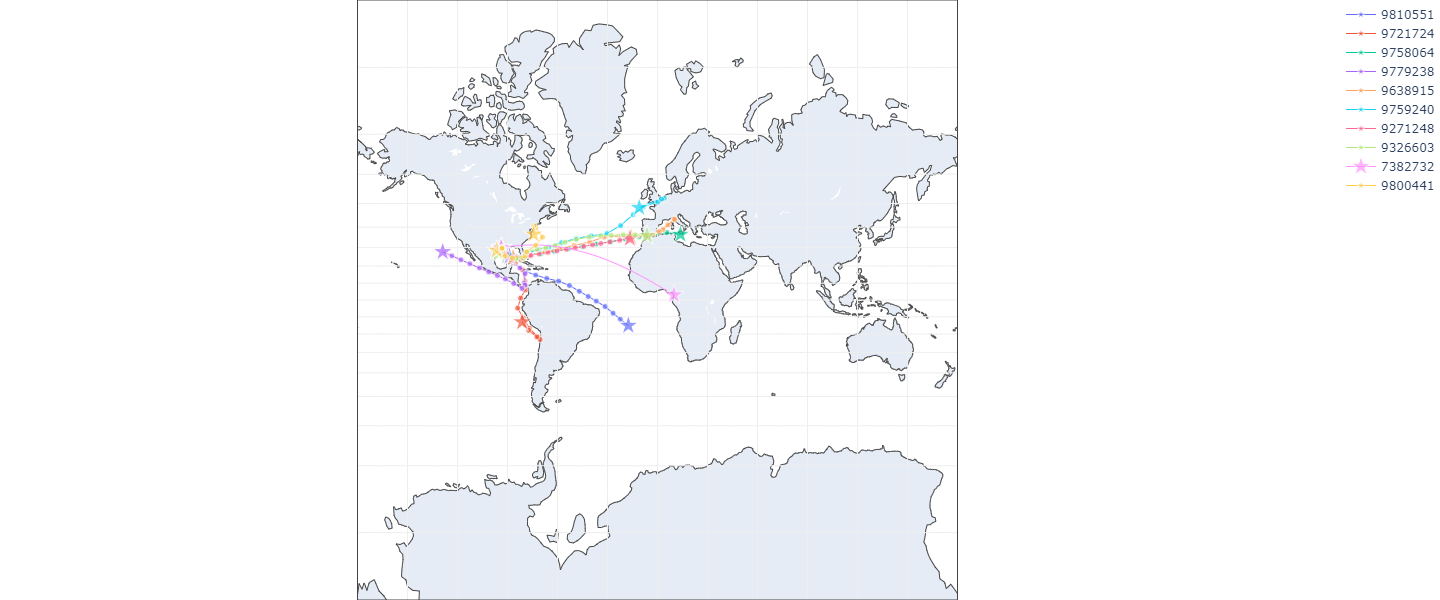

{'9810551':                      Dt.Next   Lat.Next   Lon.Next                   Dt.Prev  \
 0  2020-06-01 22:53:09+00:00  28.103787 -94.487870 2020-05-31 23:57:21+00:00   
 1  2020-05-31 23:57:21+00:00  28.938457 -95.307322 2020-05-30 23:58:16+00:00   
 2  2020-05-30 23:58:16+00:00  28.857800 -95.158933 2020-05-29 13:44:57+00:00   
 3  2020-05-29 13:44:57+00:00  25.535153 -90.178952 2020-05-28 23:51:16+00:00   
 4  2020-05-28 23:51:16+00:00  25.133590 -89.404733 2020-05-27 22:54:47+00:00   
 5  2020-05-27 22:54:47+00:00  21.428387 -85.168175 2020-05-26 23:14:06+00:00   
 6  2020-05-26 23:14:06+00:00  16.921728 -79.354758 2020-05-25 23:44:34+00:00   
 7  2020-05-25 23:44:34+00:00  14.778295 -73.091668 2020-05-24 23:36:47+00:00   
 8  2020-05-24 23:36:47+00:00  12.861157 -66.487182 2020-05-23 23:57:11+00:00   
 9  2020-05-23 23:57:11+00:00  11.238802 -59.258750 2020-05-22 23:42:29+00:00   
 10 2020-05-22 23:42:29+00:00   8.659867 -52.826105 2020-05-21 23:53:42+00:00   
 11 2020-05-21 23

In [16]:
get_data(vessel_imo[0:10],'2020-05-15')

# Interest Rates

"I am looking for repo rates. I want to group by Central Bank and show only 3 rates per Central Bank if applicable"

In [13]:
rdp.search(
  view = rdp.SearchViews.IndicatorQuotes,
  query = "repo rate",
  #"Filter": "CentralBankName in ('Federal Reserve System' 'Bank of England')",
  group_by = "CentralBankName",
  group_count = 3,
  select = "CentralBankName,DocumentTitle,RIC,ObservationValue",
  top = 1000)

,RIC,CentralBankName,ObservationValue,DocumentTitle
0,CZCBIR=ECI,Czech National Bank,0.250,"Czech Republic, Policy Rates, Repo Rate (2 Week)"
1,pCZCBIR=F,Czech National Bank,0.517,"Czech Republic, Repo Rate (2 Week) - Smart Est..."
2,pCZCBIR=M,Czech National Bank,0.500,"Czech Republic, Repo Rate (2 Week) - Median"
3,INREPO=ECI,Reserve Bank of India,4.000,"India, Policy Rates, Repo Rate"
4,INRREP=ECI,Reserve Bank of India,3.350,"India, Policy Rates, Reverse Repo Rate"
5,pINREPO=8589934333R,Reserve Bank of India,9.000,"India, Repo Rate - Barclays"
6,HUINT=ECI,National Bank of Hungary,0.900,"Hungary, Policy Rates, Base Rate"
7,pHUINT=4295862902,National Bank of Hungary,5.250,"Hungary, Base Rate - TD Asset Mgmnt"
8,pHUINT=4295862902R,National Bank of Hungary,20.000,"Hungary, Base Rate - TD Asset Mgmnt"
9,KROCRT=ECI,Bank of Korea,0.500,"South Korea, Policy Rates, Base Rate"


In [15]:
import refinitiv.dataplatform.legacy as ek
from datetime import datetime, timedelta
import dateutil
import math
import pandas as pd, numpy as np
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

ek.set_app_key('DEFAULT_CODE_BOOK_APP_KEY')
init_notebook_mode(connected=True)

data = pd.DataFrame()

class SingleVesselHelper:
    @classmethod
    def calculate(cls, df):
        """
        Takes a dataframe with columns:
        # DateTime or AIS Date Time - date when transponder data was received
        # Latitude - vessel latitude
        # Longitude - vessel longitude
        
        DataFrame must be sorted by DateTime column in descending order (latest records first)

        Returns a new dataframe with columns:
        # Dt.Prev, Dt.Next
        # Lat.Prev, Lat.Next
        # Lon.Prev, Lon.Next
        # Dist
        # Hours
        # AvgSpeed
        """
        
        # Creating differential dataset 
        diffs = cls.__make_diffs(df)
        
        # Calculating distances
        diffs['Distance'] = diffs.apply(
            lambda row: cls.__dist(row['Lon.Next'], row['Lat.Next'], row['Lon.Prev'], row['Lat.Prev']), 
            axis=1
        )
        
        # Calculating hours differences
        diffs['DiffHours'] = diffs.apply(
            lambda row: cls.__diff_hours(row['Dt.Next'], row['Dt.Prev']),
            axis=1
        )         
        
        # Calculating average speeds
        diffs['AvgSpeed'] = diffs['Distance']/diffs['DiffHours']
        
        return diffs
    
    @classmethod
    def __diff_hours(cls, next_dt, prev_dt):
        delta = next_dt - prev_dt
        return delta.days*24 + delta.seconds/3600
    
    @classmethod
    def __dist(cls, lon1, lat1, lon2, lat2):
        """
        Calculate the great circle distance between two points 
        on the earth (specified in decimal degrees)
        """
        # convert decimal degrees to radians 
        lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

        # haversine formula 
        dlon = lon2 - lon1 
        dlat = lat2 - lat1 
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.asin(math.sqrt(a)) 
        r = 6371 / 1.852 # Km -> nautical miles
        return c * r

    @classmethod
    def __make_diffs(cls, df):
        temp = pd.DataFrame(df)
        if not 'DateTime' in temp and not 'AIS Date Time' in temp:
            raise ValueError('No DateTime column in dataset')
        elif 'AIS Date Time' in temp:
            temp['DateTime'] = temp['AIS Date Time'].apply(dateutil.parser.parse)

        if not 'Latitude' in temp:
            raise ValueError('No Latitude column in dataset')
        if not 'Longitude' in temp:
            raise ValueError('No Longitude column in dataset')
        
        # Dropping all unnecessary columns
        cropped = temp[['DateTime', 'Latitude', 'Longitude']]
            
        # Creating shifted dataframes - current
        df_next = pd.DataFrame(cropped).iloc[:-1].reset_index()
        df_next.rename(columns={"DateTime": "Dt.Next", "Latitude": "Lat.Next", "Longitude": "Lon.Next"}, inplace=True)
        del df_next['index']
        
        # And previous        
        df_prev = pd.DataFrame(cropped).iloc[1:].reset_index()
        df_prev.rename(columns={"DateTime": "Dt.Prev", "Latitude": "Lat.Prev", "Longitude": "Lon.Prev"}, inplace=True)
        del df_prev['index']

        # And concatenating
        dataframe = pd.concat([df_next, df_prev], axis=1, join='inner')
        return dataframe
    
class MultipleVesselHelper:
    def load(self, vessel_ids, days, start_date):
        self.data, err = ek.get_data(
            vessel_ids, 
            ['TR.AssetLocationLatitude','TR.AssetLocationLongitude', 'TR.AssetDateTime'], 
            {"VDT":"True", "SDate":days, "EDate":start_date, "CH":"Fd", "RH":"IN"} # "0D", "2018-01-01"
        )
        self.data['Instrument'] = self.data['Instrument'].astype(str)
        self.data['DateTime'] = self.data['AIS Date Time'].apply(dateutil.parser.parse)
        self.__recalculate(vessel_ids)
        
    def __recalculate(self, vessel_ids):
        self.joined = {}
        for vessel_id in vessel_ids:
            df = self.data[self.data['Instrument'] == vessel_id]
            if df.empty:
                continue 
            calculated = SingleVesselHelper.calculate(df)
            self.joined[vessel_id] = calculated 
    
    def __get_map_points(self, vessel_id):
        joined = self.joined[vessel_id]
        data = self.data[self.data['Instrument'] == vessel_id]
        
        def get_labels():
            def make_label(row):
                if row is None:
                    return "Start"
                else:
                    vel = row['AvgSpeed'] if not math.isnan(row['AvgSpeed']) else 0
                    dist = row['Distance'] if not math.isnan(row['Distance']) else 0
                    return "{:%b, %d '%y} / {:2.2f}nm / {:2.2f}kn".format(row['Dt.Next'], dist, vel)            

            def handle_row(row):
                item = joined[joined['Dt.Next'] == row['DateTime']]
                if item.empty:
                    return None
                else:
                    return make_label(item.iloc[0])

            return data.apply(handle_row, axis=1)  

        def mark_first_and_last(count, first, last, others):
            array = [others] * count
            array[0] = first
            array[-1] = last
            return array

        return go.Scattergeo(
            lon = data['Longitude'],
            lat = data['Latitude'],
            hovertext = get_labels(),
            name = vessel_id,
            mode = 'lines+markers',
            marker = dict(
                size = mark_first_and_last(len(data), 15, 15, 6),
                symbol = mark_first_and_last(len(data), 'star', 'star', 0),
                line = dict(width = 1)
            ),
            line = go.scattergeo.Line(width = 1)
        )
    
    def plot(self, scope='asia'):
        points = []
        
        any_data = False
        
        for vessel_id in self.joined.keys():
            points.append(self.__get_map_points(vessel_id))
            any_data = True
            
        layout = dict(
            width =  900,
            height = 600,
            geo = dict(
                scope=scope,
                projection=dict(type='mercator'),
                lonaxis = dict(showgrid = True),
                lataxis = dict(showgrid = True)
            ),
            margin = dict(
                l = 0,
                r = 0,
                t = 0,
                b = 0
            )
        )
        
        if not any_data:
            print("No data to plot")
            return
        
        fig = dict(data=points, layout=layout)
        iplot(fig) 

def get_scopes():
    return ["world", "usa", "europe", "asia", "africa", "north america", "south america"]
        
def get_data(imo_list, start_date, geo_scope = 'world'):
    v = MultipleVesselHelper()
    v.load(imo_list, '0D', start_date)
    v.plot(geo_scope)
    return v.joined

# Equities

"I'm looking for equity securities in the Personal & Household Products Industry that have an EPS greater than 6 and Market Cap greater than 100 million"

In [ ]:
rdp.search(
    view=rdp.SearchViews.EquityQuotes,
    filter = "Eps gt 6.0 and RCSTRBC2012Name eq 'Personal & Household Products & Services' " \
             "and MktCapTotalUsd gt 100000000 and IsPrimaryRIC eq true",
    top =  10000,
    select ="DocumentTitle , RIC, Eps, MktCapTotalUsd")